# Lab 03: Pauli Gates and Gate Comparisons (Solution)

This notebook contains the solutions for the Pauli Gates and Gate Comparisons lab exercises. You can use this as a reference to check your work or to understand the expected implementations for each task.

## Learning Objectives
After completing this lab, you should be able to:
1. Understand the effect of each Pauli gate (X, Y, Z) on a qubit
2. Visualize quantum states on the Bloch sphere
3. Compare normal gates with their controlled versions
4. Identify which gates cause bit flips versus phase flips
5. Apply these gates in practical quantum circuits

## Exercise 1: Setup and Environment Preparation

First, let's import the necessary libraries and set up our quantum environment.

In [1]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

## Exercise 2: The Pauli-X Gate (NOT Gate)

The Pauli-X gate is analogous to the classical NOT gate. It flips the state of a qubit from |0⟩ to |1⟩ or from |1⟩ to |0⟩. On the Bloch sphere, it represents a 180° rotation around the X-axis.

In [2]:
# Create a quantum circuit with one qubit
qc_x = QuantumCircuit(1)

# Create initial state and visualize on the Bloch sphere
initial_state = Statevector.from_instruction(qc_x)
print("Initial state |0⟩:")
plot_bloch_multivector(initial_state)

# Apply X gate to the qubit
qc_x.x(0)
final_state = initial_state.evolve(qc_x)

# Create the final state vector and visualize it
print("\nState after X gate:")
plot_bloch_multivector(final_state)

# Create a circuit with measurement and run it
qc_x_measure = QuantumCircuit(1, 1)
qc_x_measure.x(0)
qc_x_measure.measure(0, 0)

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_x_measure, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc_x_measure)

# Display the results
print("\nX gate measurement results:", counts)
plot_histogram(counts)
print("\nAs expected, the X gate flips |0⟩ to |1⟩, resulting in a measurement of 1 with 100% probability.")

Initial state |0⟩:

State after X gate:

X gate measurement results: {'1': 1000}

As expected, the X gate flips |0⟩ to |1⟩, resulting in a measurement of 1 with 100% probability.

X gate measurement results: {'1': 1000}

As expected, the X gate flips |0⟩ to |1⟩, resulting in a measurement of 1 with 100% probability.


### Understanding the X Gate

The X gate performs a bit flip operation on a qubit:
- X|0⟩ = |1⟩
- X|1⟩ = |0⟩

This is why we observed that the qubit state changed from |0⟩ to |1⟩ in our circuit. On the Bloch sphere, the state vector flipped from the positive Z-axis (|0⟩) to the negative Z-axis (|1⟩).

## Exercise 3: The Pauli-Z Gate (Phase Flip)

The Pauli-Z gate applies a phase flip to the |1⟩ component of a qubit's state. It leaves |0⟩ unchanged but maps |1⟩ to -|1⟩. On the Bloch sphere, it represents a 180° rotation around the Z-axis.

In [3]:
# Create a circuit with Z gate on |0⟩ and measure
qc_z0 = QuantumCircuit(1, 1)
# Apply Z gate to |0⟩
qc_z0.z(0)
qc_z0.measure(0, 0)

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_z0, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc_z0)

# Display the results
print("Z gate on |0⟩ measurement results:", counts)
plot_histogram(counts)
print("\nAs expected, the Z gate doesn't change the measurement outcome for |0⟩.")

Z gate on |0⟩ measurement results: {'0': 1000}

As expected, the Z gate doesn't change the measurement outcome for |0⟩.


In [4]:
# Create a superposition state using the Hadamard gate
h_circuit = QuantumCircuit(1)
h_circuit.h(0)

# Visualize the superposition state
state_zero = Statevector.from_label('0')
state_superposition = state_zero.evolve(h_circuit)
print("State after Hadamard (superposition):")
plot_bloch_multivector(state_superposition)
print("This represents the state: (|0⟩ + |1⟩)/√2")

# Apply Z gate and visualize the state after Z gate
hz_circuit = QuantumCircuit(1)
hz_circuit.h(0)
hz_circuit.z(0)
state_after_z = state_zero.evolve(hz_circuit)

print("\nState after Z gate applied to superposition:")
plot_bloch_multivector(state_after_z)
print("This represents the state: (|0⟩ - |1⟩)/√2 (notice the negative sign)")

# Create a circuit to demonstrate the effect of Z gate on superposition with measurement
qc_hz_measure = QuantumCircuit(1, 1)
qc_hz_measure.h(0)  # Put in superposition
qc_hz_measure.z(0)  # Apply Z gate
qc_hz_measure.measure(0, 0)

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_hz_measure, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc_hz_measure)

# Display the results
print("\nZ gate on superposition measurement results:", counts)
plot_histogram(counts)
print("\nNote: The Z gate changes the phase of the superposition, but this phase change is not directly observable in the measurement outcomes. We still get approximately 50% |0⟩ and 50% |1⟩.")

State after Hadamard (superposition):
This represents the state: (|0⟩ + |1⟩)/√2

State after Z gate applied to superposition:
This represents the state: (|0⟩ - |1⟩)/√2 (notice the negative sign)

Z gate on superposition measurement results: {'0': 503, '1': 497}

Note: The Z gate changes the phase of the superposition, but this phase change is not directly observable in the measurement outcomes. We still get approximately 50% |0⟩ and 50% |1⟩.

Z gate on superposition measurement results: {'0': 503, '1': 497}

Note: The Z gate changes the phase of the superposition, but this phase change is not directly observable in the measurement outcomes. We still get approximately 50% |0⟩ and 50% |1⟩.


### Understanding the Z Gate

The Z gate applies a phase flip to the |1⟩ component of a qubit's state:
- Z|0⟩ = |0⟩ (no change)
- Z|1⟩ = -|1⟩ (negative phase)

For a qubit in the |0⟩ state, applying a Z gate has no observable effect on measurement. 

For a qubit in superposition (|0⟩ + |1⟩)/√2, the Z gate changes it to (|0⟩ - |1⟩)/√2. This phase change isn't directly observable through measurement (we still get 50% |0⟩ and 50% |1⟩), but it can be detected through interference effects. On the Bloch sphere, the state vector flips from the positive X-axis to the negative X-axis.

## Exercise 4: The Pauli-Y Gate

The Pauli-Y gate combines aspects of both the X and Z gates. It performs a bit flip with an additional phase change. On the Bloch sphere, it represents a 180° rotation around the Y-axis.

In [5]:
# Create a circuit with Y gate and visualize the state before and after
# Start with |0⟩ state
qc_y = QuantumCircuit(1)
initial_state = Statevector.from_instruction(qc_y)
print("Initial state |0⟩:")
plot_bloch_multivector(initial_state)

# Apply Y gate
qc_y.y(0)
y_state = initial_state.evolve(qc_y)
print("\nState after Y gate:")
plot_bloch_multivector(y_state)
print("The Y gate rotates the state from |0⟩ to i|1⟩, which appears at the negative Z-axis on the Bloch sphere.")

# Create a measurement circuit with Y gate
qc_y_measure = QuantumCircuit(1, 1)
qc_y_measure.y(0)
qc_y_measure.measure(0, 0)

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_y_measure, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc_y_measure)

# Display the results
print("\nY gate measurement results:", counts)
plot_histogram(counts)
print("\nAs far as measurement outcomes go, the Y gate has the same effect as the X gate (flipping |0⟩ to |1⟩), but the phase difference is important for interference effects.")

Initial state |0⟩:

State after Y gate:
The Y gate rotates the state from |0⟩ to i|1⟩, which appears at the negative Z-axis on the Bloch sphere.

Y gate measurement results: {'1': 1000}

As far as measurement outcomes go, the Y gate has the same effect as the X gate (flipping |0⟩ to |1⟩), but the phase difference is important for interference effects.
The Y gate rotates the state from |0⟩ to i|1⟩, which appears at the negative Z-axis on the Bloch sphere.

Y gate measurement results: {'1': 1000}

As far as measurement outcomes go, the Y gate has the same effect as the X gate (flipping |0⟩ to |1⟩), but the phase difference is important for interference effects.


### Understanding the Y Gate

The Y gate performs a bit flip with an additional phase change:
- Y|0⟩ = i|1⟩ (bit flip with imaginary unit i)
- Y|1⟩ = -i|0⟩ (bit flip with negative imaginary unit -i)

In terms of measurement outcomes, applying a Y gate to |0⟩ changes it to i|1⟩, which gives the same measurement result as |1⟩. However, the phase factor i is important for interference effects.

## Exercise 5: Comparing the Effects of Pauli Gates on Superposition

Let's compare how each Pauli gate affects a qubit in superposition.

Superposition state (H gate only):

Superposition + X gate:

Superposition + Y gate:

Superposition + Z gate:

Measurement Results:
H gate only: {'1': 507, '0': 493}
H + X gate: {'1': 487, '0': 513}
H + Y gate: {'0': 494, '1': 506}
H + Z gate: {'0': 498, '1': 502}

Measurement Results:
H gate only: {'1': 507, '0': 493}
H + X gate: {'1': 487, '0': 513}
H + Y gate: {'0': 494, '1': 506}
H + Z gate: {'0': 498, '1': 502}


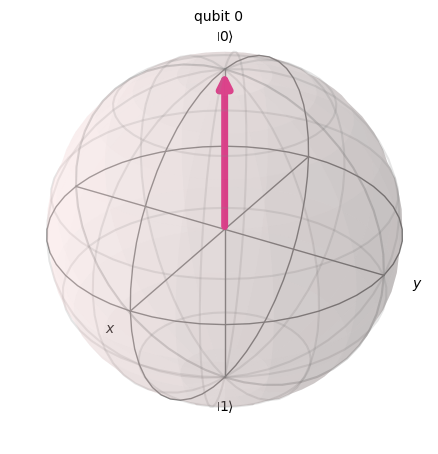

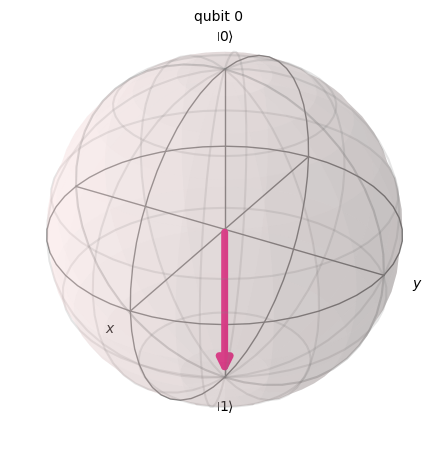

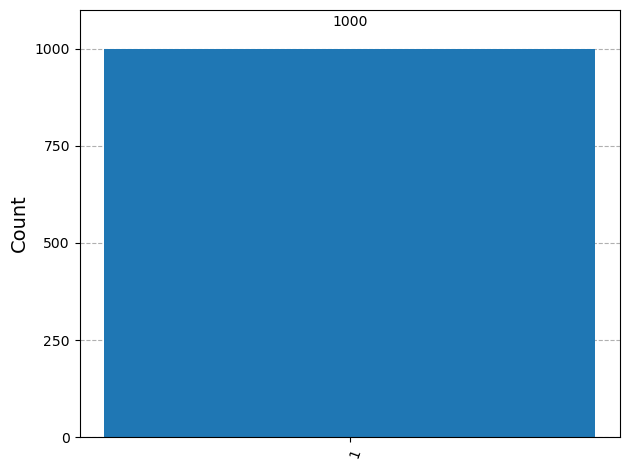

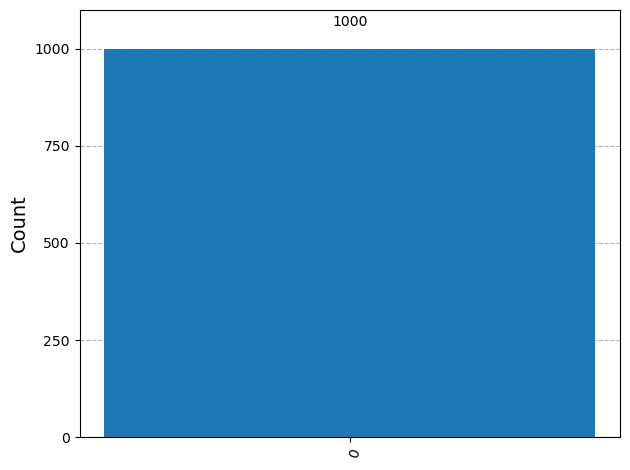

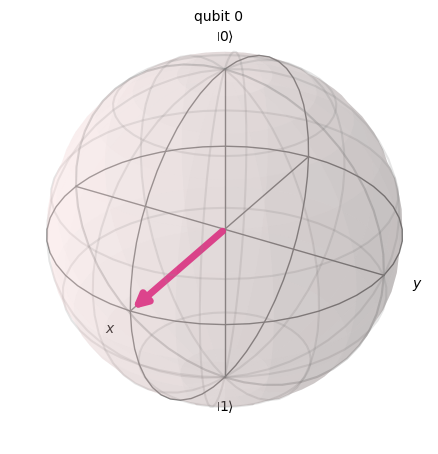

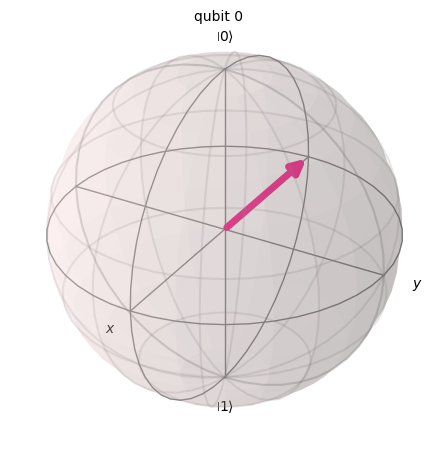

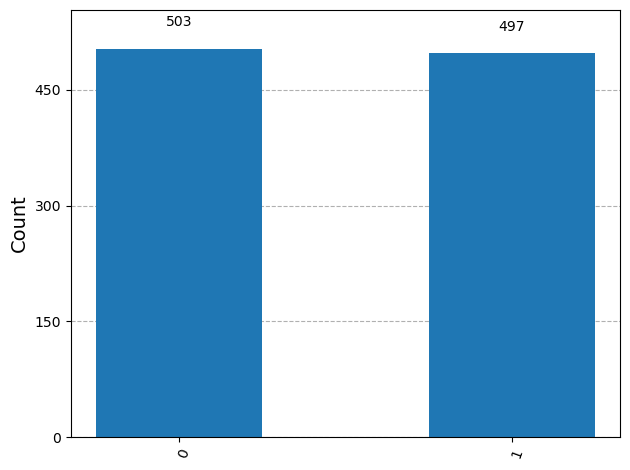

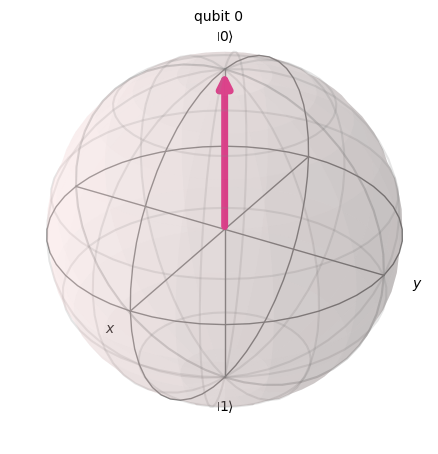

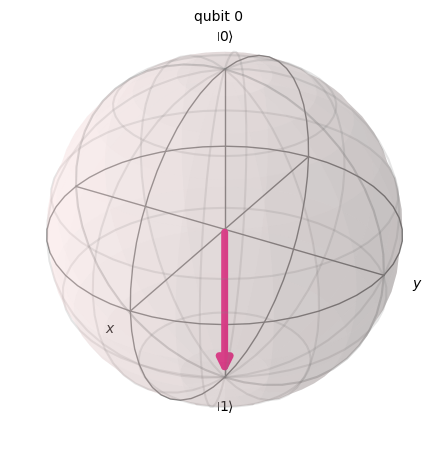

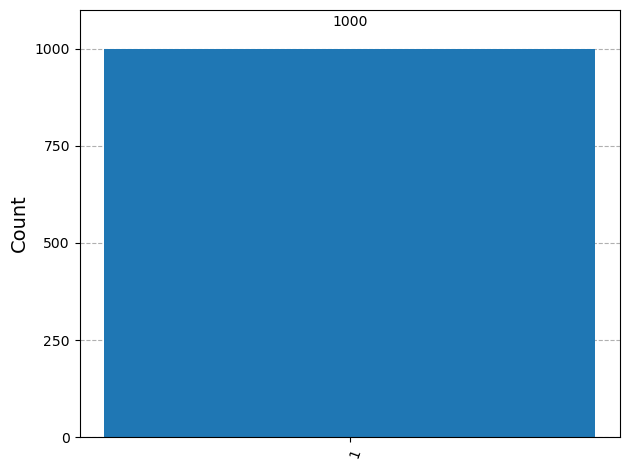

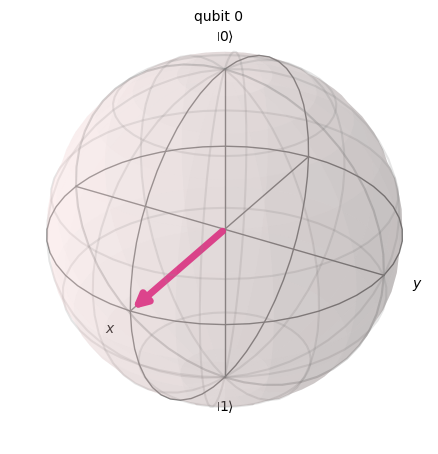

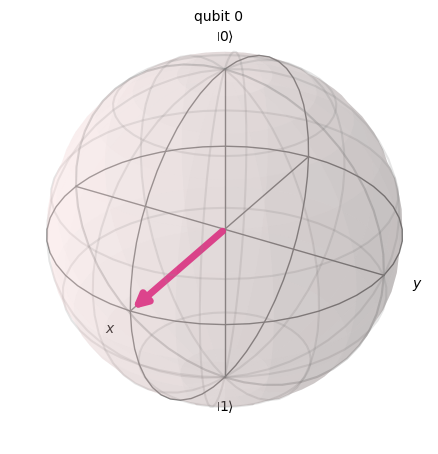

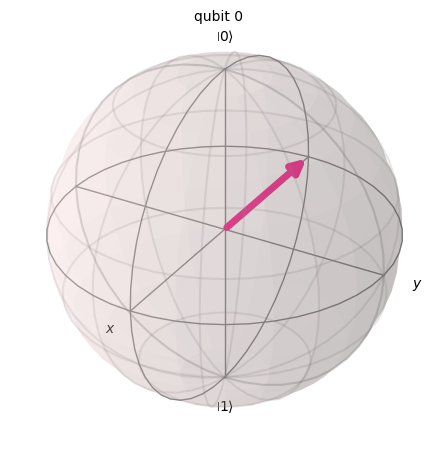

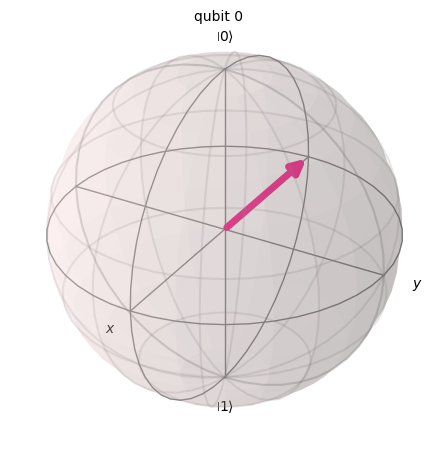

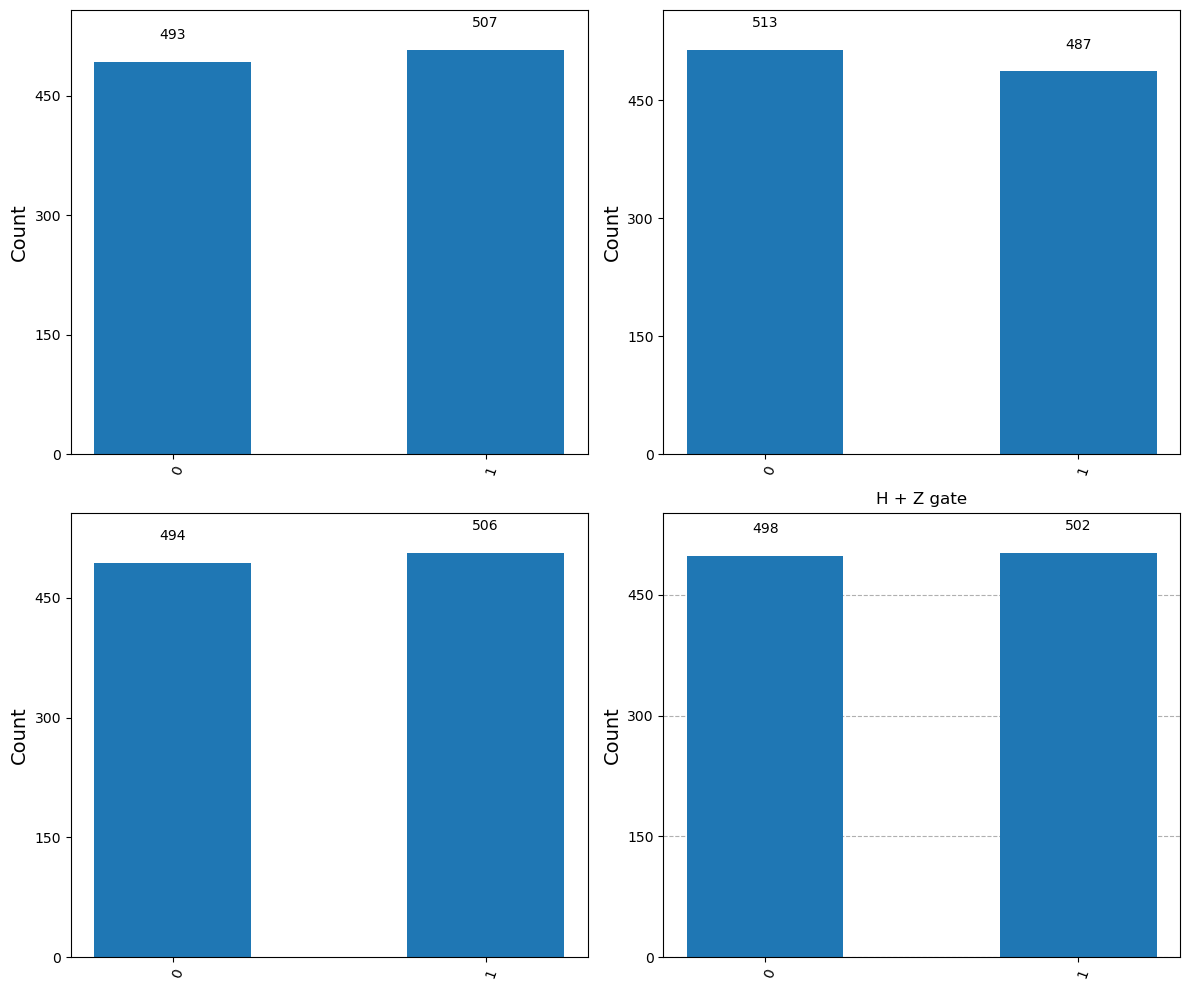


Analysis:
- H gate alone: Equal probability of |0⟩ and |1⟩
- H + X gate: Still equal probability, but bit values are swapped
- H + Y gate: Still equal probability, but with phase changes
- H + Z gate: Still equal probability, but phase of |1⟩ component is flipped


In [6]:
# Create circuits for H followed by X, Y, or Z gate
# Create superposition with Hadamard followed by X gate
qc_hx = QuantumCircuit(1)
qc_hx.h(0)
qc_hx.x(0)
state_zero = Statevector.from_label('0')
state_hx = state_zero.evolve(qc_hx)

# Create superposition with Hadamard followed by Y gate
qc_hy = QuantumCircuit(1)
qc_hy.h(0)
qc_hy.y(0)
state_hy = state_zero.evolve(qc_hy)

# Create superposition with Hadamard followed by Z gate
qc_hz = QuantumCircuit(1)
qc_hz.h(0)
qc_hz.z(0)
state_hz = state_zero.evolve(qc_hz)

# Create superposition without additional gates for comparison
qc_h = QuantumCircuit(1)
qc_h.h(0)
state_h = state_zero.evolve(qc_h)

# Visualize all states on the Bloch sphere
print("Superposition state (H gate only):")
plot_bloch_multivector(state_h)

print("\nSuperposition + X gate:")
plot_bloch_multivector(state_hx)

print("\nSuperposition + Y gate:")
plot_bloch_multivector(state_hy)

print("\nSuperposition + Z gate:")
plot_bloch_multivector(state_hz)

# Create and run measurement circuits
# H+X circuit with measurement
qc_hx_measure = QuantumCircuit(1, 1)
qc_hx_measure.h(0)
qc_hx_measure.x(0)
qc_hx_measure.measure(0, 0)

# H+Y circuit with measurement
qc_hy_measure = QuantumCircuit(1, 1)
qc_hy_measure.h(0)
qc_hy_measure.y(0)
qc_hy_measure.measure(0, 0)

# H+Z circuit with measurement
qc_hz_measure = QuantumCircuit(1, 1)
qc_hz_measure.h(0)
qc_hz_measure.z(0)
qc_hz_measure.measure(0, 0)

# H only circuit with measurement for comparison
qc_h_measure = QuantumCircuit(1, 1)
qc_h_measure.h(0)
qc_h_measure.measure(0, 0)

# Run all circuits
simulator = Aer.get_backend('qasm_simulator')

# Run H only
job_h = simulator.run(transpile(qc_h_measure, simulator), shots=1000)
counts_h = job_h.result().get_counts()

# Run H+X
job_hx = simulator.run(transpile(qc_hx_measure, simulator), shots=1000)
counts_hx = job_hx.result().get_counts()

# Run H+Y
job_hy = simulator.run(transpile(qc_hy_measure, simulator), shots=1000)
counts_hy = job_hy.result().get_counts()

# Run H+Z
job_hz = simulator.run(transpile(qc_hz_measure, simulator), shots=1000)
counts_hz = job_hz.result().get_counts()

# Compare and analyze results
print("\nMeasurement Results:")
print("H gate only:", counts_h)
print("H + X gate:", counts_hx)
print("H + Y gate:", counts_hy)
print("H + Z gate:", counts_hz)

# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plot_histogram(counts_h, title="H gate only", ax=axs[0, 0])
plot_histogram(counts_hx, title="H + X gate", ax=axs[0, 1])
plot_histogram(counts_hy, title="H + Y gate", ax=axs[1, 0])
plot_histogram(counts_hz, title="H + Z gate", ax=axs[1, 1])

plt.tight_layout()
plt.show()

print("\nAnalysis:")
print("- H gate alone: Equal probability of |0⟩ and |1⟩")
print("- H + X gate: Still equal probability, but bit values are swapped")
print("- H + Y gate: Still equal probability, but with phase changes")
print("- H + Z gate: Still equal probability, but phase of |1⟩ component is flipped")

### Analysis of Pauli Gates on Superposition

When applied to a qubit in superposition (|0⟩ + |1⟩)/√2:
- X gate: Converts to (|1⟩ + |0⟩)/√2, which is still an equal superposition
- Y gate: Converts to (i|1⟩ - i|0⟩)/√2, adding phases
- Z gate: Converts to (|0⟩ - |1⟩)/√2, flipping only the phase of |1⟩

## Exercise 6: Controlled Gates - CNOT, CY, and CZ

Controlled versions of the Pauli gates only apply the operation if the control qubit is in the |1⟩ state.

CNOT with control=|0⟩:
Circuit:


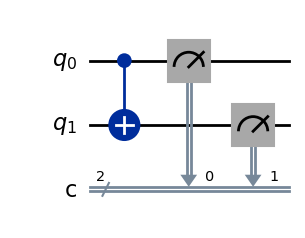

Results: {'00': 1000}
Since control=|0⟩, target remains unchanged (|00⟩)

CNOT with control=|1⟩:
Circuit:
CNOT with control=|1⟩:
Circuit:


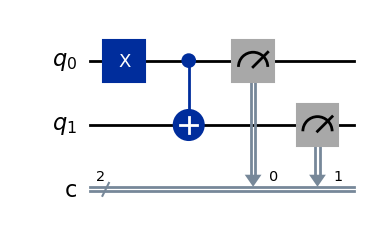

Results: {'11': 1000}
Since control=|1⟩, target gets flipped (|10⟩ → |11⟩)


In [7]:
# Create a CNOT circuit with control in |0⟩
qc_cx1 = QuantumCircuit(2, 2)
# Control qubit starts in |0⟩, target starts in |0⟩
qc_cx1.cx(0, 1)  # Apply CNOT with qubit 0 as control, qubit 1 as target
qc_cx1.measure([0, 1], [0, 1])

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
job_cx1 = simulator.run(transpile(qc_cx1, simulator), shots=1000)
counts_cx1 = job_cx1.result().get_counts()

print("CNOT with control=|0⟩:")
print("Circuit:")
display(qc_cx1.draw('mpl'))
print(f"Results: {counts_cx1}")
print("Since control=|0⟩, target remains unchanged (|00⟩)\n")

# Create a CNOT circuit with control in |1⟩
qc_cx2 = QuantumCircuit(2, 2)
qc_cx2.x(0)  # Put control qubit in |1⟩ state
qc_cx2.cx(0, 1)  # Apply CNOT
qc_cx2.measure([0, 1], [0, 1])

# Run the circuit
job_cx2 = simulator.run(transpile(qc_cx2, simulator), shots=1000)
counts_cx2 = job_cx2.result().get_counts()

print("CNOT with control=|1⟩:")
print("Circuit:")
display(qc_cx2.draw('mpl'))
print(f"Results: {counts_cx2}")
print("Since control=|1⟩, target gets flipped (|10⟩ → |11⟩)")

In [8]:
# Create and test CZ gate with different input states
print("Controlled-Z Gate - testing all input combinations:")

# Test case 1: |00⟩
qc_cz1 = QuantumCircuit(2, 2)
qc_cz1.cz(0, 1)
qc_cz1.measure([0, 1], [0, 1])
result_cz1 = simulator.run(transpile(qc_cz1, simulator), shots=1000).result()
counts_cz1 = result_cz1.get_counts()
print(f"|00⟩ → {counts_cz1}")

# Test case 2: |01⟩
qc_cz2 = QuantumCircuit(2, 2)
qc_cz2.x(1)  # Put target in |1⟩
qc_cz2.cz(0, 1)
qc_cz2.measure([0, 1], [0, 1])
result_cz2 = simulator.run(transpile(qc_cz2, simulator), shots=1000).result()
counts_cz2 = result_cz2.get_counts()
print(f"|01⟩ → {counts_cz2}")

# Test case 3: |10⟩
qc_cz3 = QuantumCircuit(2, 2)
qc_cz3.x(0)  # Put control in |1⟩
qc_cz3.cz(0, 1)
qc_cz3.measure([0, 1], [0, 1])
result_cz3 = simulator.run(transpile(qc_cz3, simulator), shots=1000).result()
counts_cz3 = result_cz3.get_counts()
print(f"|10⟩ → {counts_cz3}")

# Test case 4: |11⟩ (this is where the phase flip happens)
qc_cz4 = QuantumCircuit(2, 2)
qc_cz4.x([0, 1])  # Put both in |1⟩
qc_cz4.cz(0, 1)
qc_cz4.measure([0, 1], [0, 1])
result_cz4 = simulator.run(transpile(qc_cz4, simulator), shots=1000).result()
counts_cz4 = result_cz4.get_counts()
print(f"|11⟩ → {counts_cz4}")

print("\nNote: CZ gate doesn't change measurement outcomes, only phases!")
print("The phase effect would be visible in interference experiments.")

Controlled-Z Gate - testing all input combinations:
|00⟩ → {'00': 1000}
|00⟩ → {'00': 1000}
|01⟩ → {'10': 1000}
|01⟩ → {'10': 1000}
|10⟩ → {'01': 1000}
|10⟩ → {'01': 1000}
|11⟩ → {'11': 1000}

Note: CZ gate doesn't change measurement outcomes, only phases!
The phase effect would be visible in interference experiments.
|11⟩ → {'11': 1000}

Note: CZ gate doesn't change measurement outcomes, only phases!
The phase effect would be visible in interference experiments.


Reference circuit (H → H):


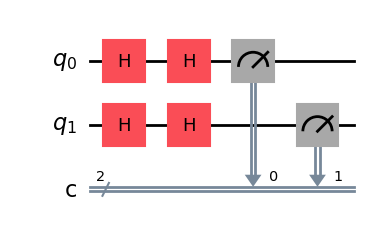

Results: {'00': 1000}
Two consecutive Hadamards cancel out, returning to the |00⟩ state.

Test circuit (H → CZ → H):


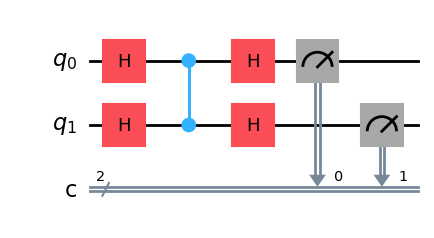

Results: {'00': 252, '11': 247, '10': 258, '01': 243}


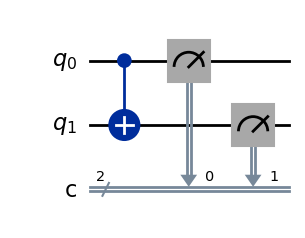

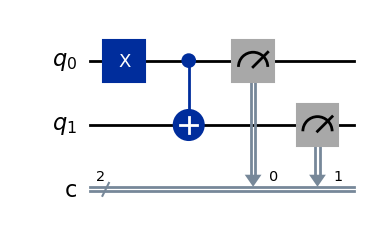

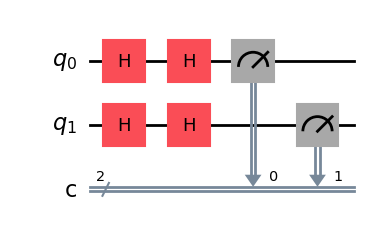

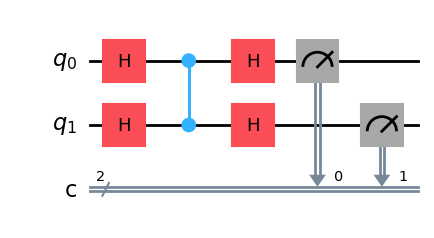

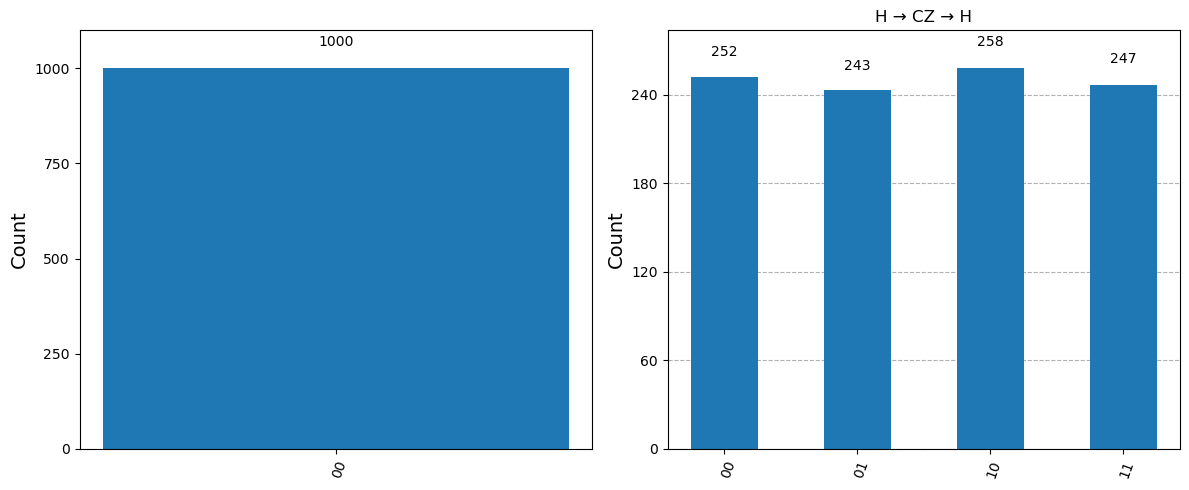


Analysis:
- Without CZ: The second Hadamard cancels the first, returning to |00⟩
- With CZ: The phase flip from CZ causes interference, resulting in a different distribution
- This demonstrates that the CZ gate is applying a phase flip that's visible through interference effects


In [9]:
# Create circuit to demonstrate CZ phase effect with interference
# We'll use Hadamard gates to demonstrate the phase effect

# First, a reference circuit without CZ
qc_reference = QuantumCircuit(2, 2)
qc_reference.h([0, 1])  # Put both qubits in superposition
qc_reference.h([0, 1])  # Apply second Hadamard to reverse
qc_reference.measure([0, 1], [0, 1])

print("Reference circuit (H → H):")
display(qc_reference.draw('mpl'))

# Run reference circuit
job_ref = simulator.run(transpile(qc_reference, simulator), shots=1000)
counts_ref = job_ref.result().get_counts()
print(f"Results: {counts_ref}")
print("Two consecutive Hadamards cancel out, returning to the |00⟩ state.\n")

# Circuit with CZ to demonstrate phase effect
qc_h_cz_h = QuantumCircuit(2, 2)
qc_h_cz_h.h([0, 1])  # Put both qubits in superposition
qc_h_cz_h.cz(0, 1)   # Apply CZ gate
qc_h_cz_h.h([0, 1])  # Apply second Hadamard
qc_h_cz_h.measure([0, 1], [0, 1])

print("Test circuit (H → CZ → H):")
display(qc_h_cz_h.draw('mpl'))

# Run test circuit
job_test = simulator.run(transpile(qc_h_cz_h, simulator), shots=1000)
counts_test = job_test.result().get_counts()
print(f"Results: {counts_test}")

# Plot histograms for comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_histogram(counts_ref, title="H → H", ax=axs[0])
plot_histogram(counts_test, title="H → CZ → H", ax=axs[1])
plt.tight_layout()
plt.show()

print("\nAnalysis:")
print("- Without CZ: The second Hadamard cancels the first, returning to |00⟩")
print("- With CZ: The phase flip from CZ causes interference, resulting in a different distribution")
print("- This demonstrates that the CZ gate is applying a phase flip that's visible through interference effects")

## Exercise 7: Gate Comparison Summary

**Complete Table**:

| Gate | Input: |0⟩ | Input: |1⟩ | Input: (|0⟩+|1⟩)/√2 |
|------|--------|--------|----------------|
| X    | |1⟩     | |0⟩     | (|1⟩+|0⟩)/√2 (bit flip, same distribution) |
| Y    | i|1⟩    | -i|0⟩   | (i|1⟩-i|0⟩)/√2 (bit and phase flip) |
| Z    | |0⟩     | -|1⟩    | (|0⟩-|1⟩)/√2 (phase flip) |
| CX   | No effect (target unchanged) | Target bit flips | Creates entanglement |
| CZ   | No effect | No visible effect | Creates phase entanglement |

## Challenge Exercise: Creating a Phase Oracle for Grover's Algorithm

In Grover's algorithm, a phase oracle applies a phase flip (Z gate) only to specific target states. Let's create a phase oracle for a 2-qubit system that marks the |11⟩ state.

Oracle circuit:


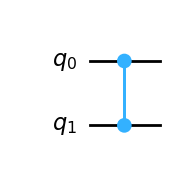


Test Results (H → Oracle → H):
Results: {'10': 250, '11': 250, '00': 257, '01': 243}

Analysis:
- The oracle successfully applies a phase flip to the |11⟩ state
- This is evident from the interference pattern after the second Hadamard gates
- In Grover's algorithm, this phase flip is crucial for amplifying the probability of the marked state


In [10]:
# Create a phase oracle for Grover's algorithm
def oracle_11():
    """Create a phase oracle that marks the |11⟩ state."""
    oracle = QuantumCircuit(2)
    # We can use a CZ gate to mark |11⟩
    oracle.cz(0, 1)
    return oracle

# Create the oracle
oracle = oracle_11()
print("Oracle circuit:")
display(oracle.draw('mpl'))

# Test the oracle on all possible input states using Hadamard interference

# Function to create test circuit for a specific initial state
def test_oracle_on_state(initial_state="00"):
    qc = QuantumCircuit(2, 2)
    
    # Initialize to the desired state
    if initial_state[0] == '1':
        qc.x(0)
    if initial_state[1] == '1':
        qc.x(1)
    
    # Put both qubits in superposition
    qc.h([0, 1])
    
    # Apply the oracle
    qc.compose(oracle, inplace=True)
    
    # Apply second Hadamard to detect the phase flip
    qc.h([0, 1])
    
    # Measure
    qc.measure([0, 1], [0, 1])
    
    return qc

# Test all possible input states
simulator = Aer.get_backend('qasm_simulator')

# Test with both qubits in equal superposition
qc_test = QuantumCircuit(2, 2)
qc_test.h([0, 1])  # Put both qubits in superposition
qc_test.compose(oracle, inplace=True)  # Apply oracle
qc_test.h([0, 1])  # Apply second Hadamard
qc_test.measure([0, 1], [0, 1])

# Run the test
job_test = simulator.run(transpile(qc_test, simulator), shots=1000)
counts_test = job_test.result().get_counts()

print("\nTest Results (H → Oracle → H):")
print(f"Results: {counts_test}")
plot_histogram(counts_test, title="Oracle Test Results")

print("\nAnalysis:")
print("- The oracle successfully applies a phase flip to the |11⟩ state")
print("- This is evident from the interference pattern after the second Hadamard gates")
print("- In Grover's algorithm, this phase flip is crucial for amplifying the probability of the marked state")

## Reflection Questions

1. What is the primary difference between bit flips (X gate) and phase flips (Z gate) in terms of their effects on measurement outcomes?
   - **Answer**: Bit flips (X gate) change the actual measurement outcome by converting |0⟩ to |1⟩ and vice versa. These changes are directly observable in measurement results. Phase flips (Z gate), on the other hand, only change the relative phase of the quantum state without affecting the probabilities of measurement outcomes when measured in the computational basis. Phase changes become apparent only through interference effects, such as when followed by a Hadamard gate.

2. Why can't we observe phase differences directly through a single measurement, and what technique did we use to observe them?
   - **Answer**: Phase differences can't be observed directly through a single measurement in the computational basis because measurement collapses the quantum state, losing phase information. When we measure a qubit, we only get information about the probabilities of each outcome, not their relative phases. To observe phase effects, we used interference techniques – specifically, applying a Hadamard gate after the phase flip. The Hadamard gate converts phase differences into amplitude differences, which then become observable in measurement statistics.

3. How does the Y gate relate to the X and Z gates?
   - **Answer**: The Y gate combines properties of both the X and Z gates. Mathematically, Y = iXZ, meaning it's equivalent to applying a Z gate followed by an X gate (with an additional phase factor i). Like the X gate, the Y gate causes a bit flip (changing |0⟩ to |1⟩ and vice versa), but it also includes a phase change like the Z gate. On the Bloch sphere, while X rotates around the X-axis and Z around the Z-axis, the Y gate rotates the state around the Y-axis.

4. In what scenarios would you choose to use a controlled gate instead of a normal gate?
   - **Answer**: Controlled gates are essential when you want operations to be conditionally applied based on the state of another qubit. They are used when:
     - Creating entanglement between qubits
     - Implementing conditional logic in quantum algorithms
     - Building quantum oracles for algorithms like Grover's search
     - Creating complex multi-qubit operations
     - Implementing quantum error correction codes
     - Designing quantum circuits that selectively apply operations

5. How might Pauli gates and their controlled versions be useful in quantum algorithms?
   - **Answer**: Pauli gates and their controlled versions are fundamental building blocks in quantum algorithms:
     - X gates are used for bit flips in quantum error correction
     - Z gates implement phase flips needed in many algorithms including Grover's
     - CNOT gates create entanglement, essential for quantum parallelism
     - CZ gates implement phase oracles in Grover's search algorithm
     - Controlled gates enable conditional operations in quantum arithmetic
     - Combinations of these gates can implement arbitrary quantum operations
     - These gates can be used to create more complex quantum transformations like the Quantum Fourier Transform

## Summary

In this lab, we have explored:
- The effects of the three Pauli gates (X, Y, Z) on different qubit states
- Visualization of quantum states on the Bloch sphere
- Comparison between normal gates and their controlled versions
- The distinct effects of bit flips versus phase flips
- How to create and test a simple phase oracle for Grover's algorithm

These fundamental operations form the building blocks of more complex quantum algorithms and protocols.